# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entri

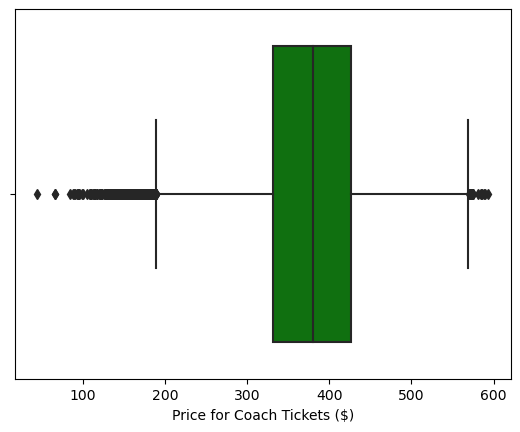

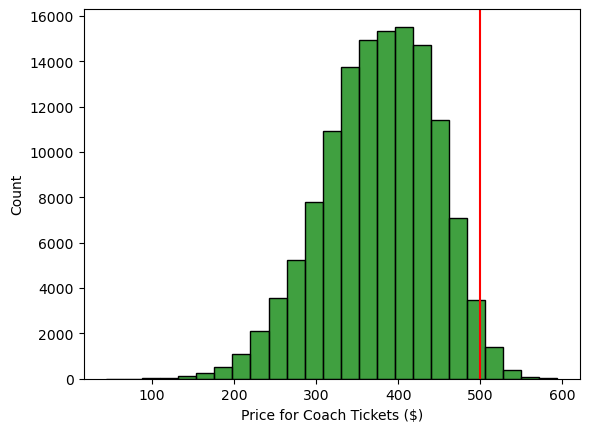

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())
print(flight.info())

# finding max, min, mean, etc.
min_coach = round(np.min(flight.coach_price), 2)
max_coach = round(np.max(flight.coach_price), 2)
range_coach = max_coach - min_coach
mean_coach = round(np.mean(flight.coach_price), 2)
median_coach = round(np.median(flight.coach_price), 2)
mean_max_coach_diff = round(max_coach - mean_coach, 2)

print('\nMinimum Price for Coach: ${}'.format(min_coach))
print('Maximum Price for Coach: ${}'.format(max_coach))
print('Range of Prices for Coach: ${}'.format(range_coach))
print('Mean Price for Coach: ${}'.format(mean_coach))
print('Median Price for Coach: ${}'.format(median_coach))
print('Difference b/t Max and Mean Price for Coach: ${}'.format(mean_max_coach_diff))

# visualizing coach_price 
sns.boxplot(x='coach_price',color='g', data=flight)
plt.xlabel('Price for Coach Tickets ($)')
plt.show()
plt.clf()

sns.histplot(x='coach_price', bins=25, color='g', data=flight)
plt.xlabel('Price for Coach Tickets ($)')
plt.axvline(500, color='r')
plt.show()
plt.clf()

# based on these findings, $500 for coach does not seem like a good price.

500 dollars for coach seems like an unreasonable price based on the mean and median coach ticket prices being approximately 380 dollars.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

For trips exactly 8 hours in duration . . .
Minimum Price for Coach: $170.77
Maximum Price for Coach: $593.63
Range of Prices for Coach: $422.86
Mean Price for Coach: $431.83
Median Price for Coach: $437.12


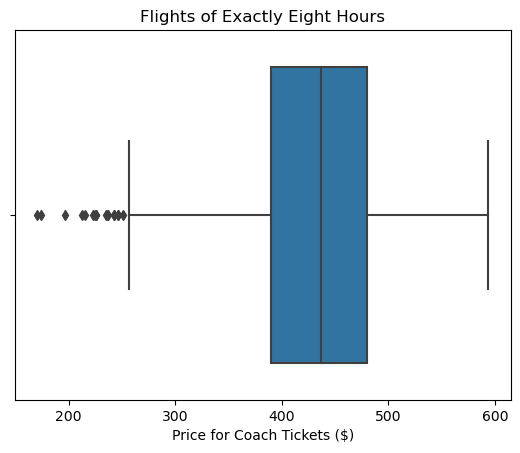

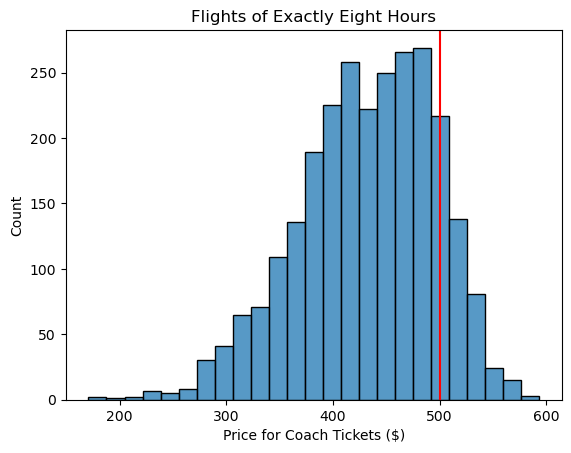

<Figure size 640x480 with 0 Axes>

In [3]:
## Task 20
eight_hr_flights = flight[flight.hours == 8]

min_coach_8hr = round(np.min(eight_hr_flights.coach_price), 2)
max_coach_8hr = round(np.max(eight_hr_flights.coach_price), 2)
range_coach_8hr = max_coach_8hr - min_coach_8hr
mean_coach_8hr = round(np.mean(eight_hr_flights.coach_price), 2)
median_coach_8hr = round(np.median(eight_hr_flights.coach_price), 2)

print('For trips exactly 8 hours in duration . . .')
print('Minimum Price for Coach: ${}'.format(min_coach_8hr))
print('Maximum Price for Coach: ${}'.format(max_coach_8hr))
print('Range of Prices for Coach: ${}'.format(range_coach_8hr))
print('Mean Price for Coach: ${}'.format(mean_coach_8hr))
print('Median Price for Coach: ${}'.format(median_coach_8hr))

sns.boxplot(x='coach_price', data=eight_hr_flights)
plt.title('Flights of Exactly Eight Hours')
plt.xlabel('Price for Coach Tickets ($)')
plt.show()
plt.clf()

sns.histplot(x='coach_price', bins=25, data=eight_hr_flights)
plt.title('Flights of Exactly Eight Hours')
plt.xlabel('Price for Coach Tickets ($)')
plt.axvline(500, color='r')
plt.show()
plt.clf()

# based on these findings, $500 for coach seems more reasonable when
# the flight is 8 hours in duration, but would still be above the average.

For flights with exactly an eight hour duration, the 500 dollar ticket price for coach is more inline with the mean and median cost of approximately 440 dollars.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [4]:
## Task 3
min_delay = np.min(flight.delay)
max_delay = np.max(flight.delay)
range_delay = max_delay - min_delay
mean_delay = round(np.mean(flight.delay), 2)
median_delay = round(np.median(flight.delay), 2)

print('Minimum Flight Delay: {} min'.format(min_delay))
print('Maximum Flight Delay: {} min'.format(max_delay))
print('Range of Flight Delays: {} min'.format(range_delay))
print('Mean Flight Delay: {} min'.format(mean_delay))
print('Median Flight Delay: {} min'.format(median_delay))

Minimum Flight Delay: 0 min
Maximum Flight Delay: 1560 min
Range of Flight Delays: 1560 min
Mean Flight Delay: 13.16 min
Median Flight Delay: 10.0 min


The max flight delay is well above the mean and median times, so analysis might need to be done with those removed to better understand the typical delay.

Of the 129780 flights on record, 129680 flights had less a 100 minute delay and 100 had at least 100 minute delays.

Mean Delay Time: 12.02 min
Median Delay Time: 10.0 min


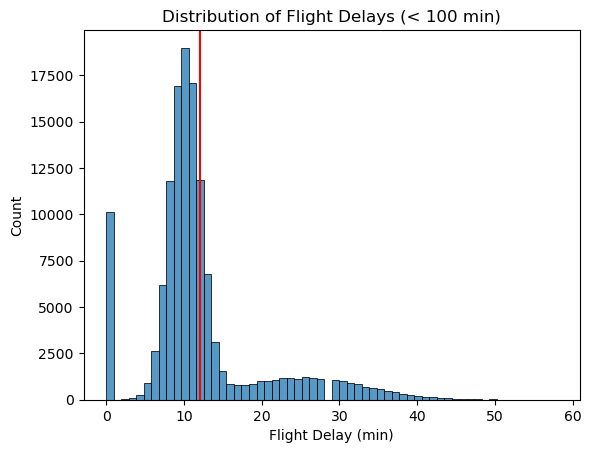

<Figure size 640x480 with 0 Axes>

In [34]:
num_flights = len(flight)
delay_lessthan_100 = flight[flight.delay < 100]
delay_atleast_100 = flight[flight.delay >= 100]
print('Of the {} flights on record, {} flights had less a 100 minute delay and {} had at least 100 minute delays.\n'.format(num_flights, len(delay_lessthan_100), len(delay_atleast_100)))

mean_delay_lessthan_100 = round(np.mean(delay_lessthan_100.delay), 2)
median_delay_lessthan_100 = round(np.median(delay_lessthan_100.delay), 2)

print('Mean Delay Time: {} min'.format(mean_delay_lessthan_100))
print('Median Delay Time: {} min'.format(median_delay_lessthan_100))

sns.histplot(x='delay', bins=60, data=delay_lessthan_100)
plt.title('Distribution of Flight Delays (< 100 min)')
plt.xlabel('Flight Delay (min)')
plt.axvline(12.02, color='r')
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

Due to the large amount of flight records, will be taking a random sample of 5% of the flight records to make the scatterplot easier to read.

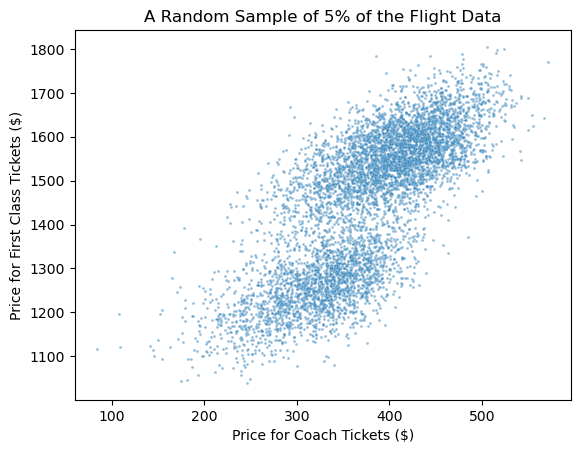

<Figure size 640x480 with 0 Axes>

In [35]:
## Task 4
flight_subset = flight.sample(n=int(flight.shape[0]*0.05))
sns.scatterplot(x='coach_price', y='firstclass_price', s=4, alpha=0.5, data=flight_subset)
plt.title('A Random Sample of 5% of the Flight Data')
plt.xlabel('Price for Coach Tickets ($)')
plt.ylabel('Price for First Class Tickets ($)')
plt.show()
plt.clf()

The scatterplot revealed that there is a general positive correlation between coach and first class ticket prices, as when the price of coach increases, so too does first class.

There also appears to be some clustering, so further analysis might need to be made to explore what that relationship might be.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

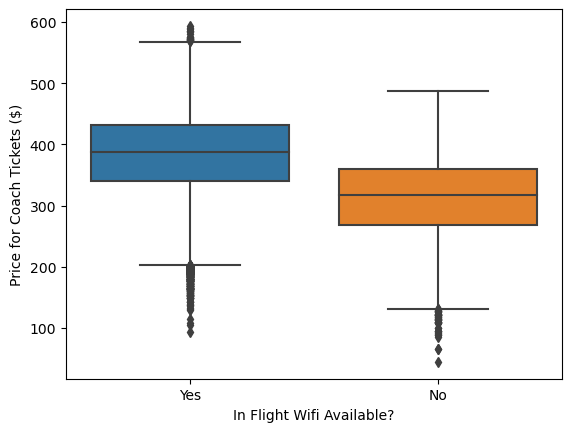

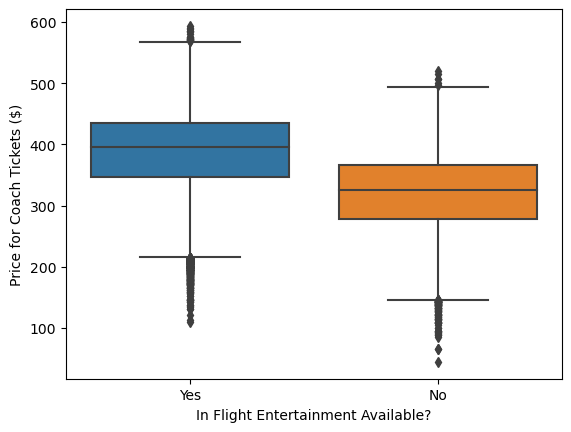

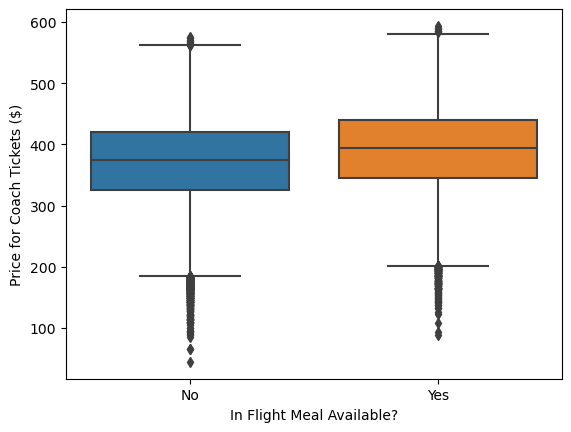

<Figure size 640x480 with 0 Axes>

In [36]:
## Task 5
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight)
plt.xlabel('In Flight Wifi Available?')
plt.ylabel('Price for Coach Tickets ($)')
plt.show()
plt.clf()

sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight)
plt.xlabel('In Flight Entertainment Available?')
plt.ylabel('Price for Coach Tickets ($)')
plt.show()
plt.clf()

sns.boxplot(x='inflight_meal', y='coach_price', data=flight)
plt.xlabel('In Flight Meal Available?')
plt.ylabel('Price for Coach Tickets ($)')
plt.show()
plt.clf()

From the boxplots, luxuries like In Flight Wifi and Entertainment raise the cost of a coach ticket. The boxplots for the two In Flight Meal options are very similar, but a meal in flight does seem to increase the price of a coach ticket.

6. How does the number of passengers change in relation to the length of flights?

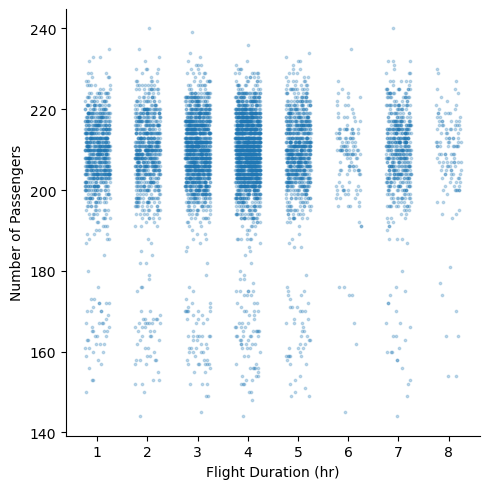

<Figure size 640x480 with 0 Axes>

In [50]:
## Task 6
sns.lmplot(x='hours', y='passengers', data=flight_subset, x_jitter=.25, scatter_kws={'s': 3, 'alpha': 0.25}, fit_reg=False)
plt.xlabel('Flight Duration (hr)')
plt.ylabel('Number of Passengers')
plt.show()
plt.clf()

It would appear that 

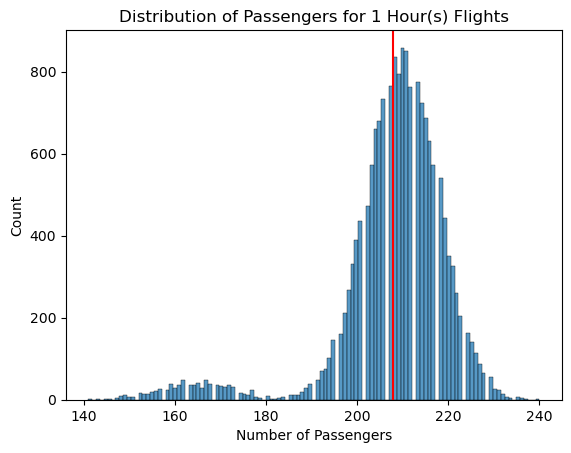

Mean Number of Passengers: 208


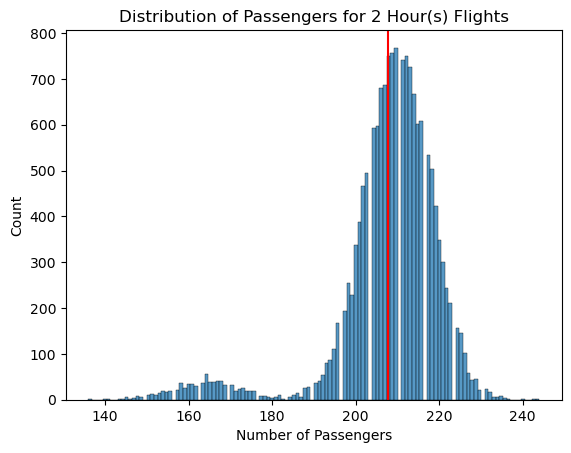

Mean Number of Passengers: 208


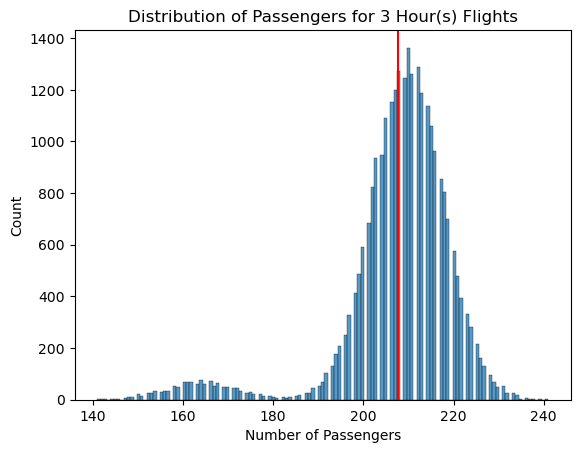

Mean Number of Passengers: 208


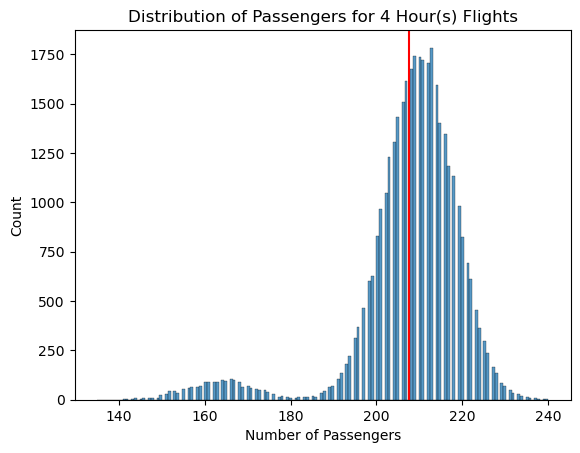

Mean Number of Passengers: 208


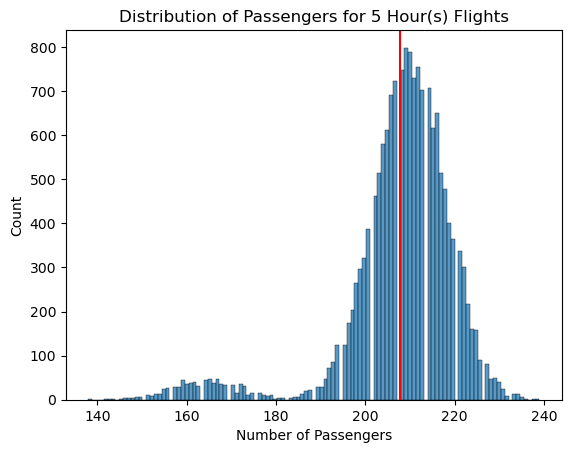

Mean Number of Passengers: 208


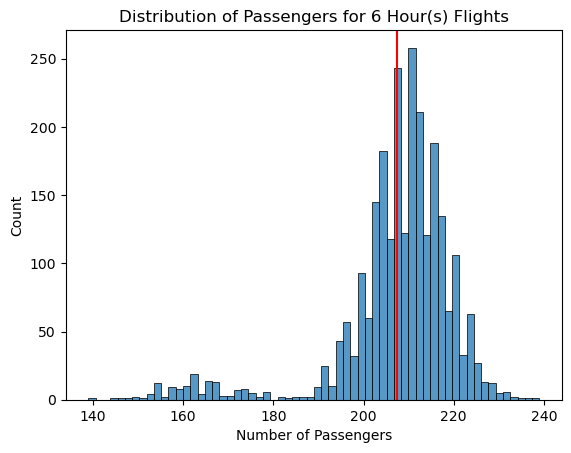

Mean Number of Passengers: 207


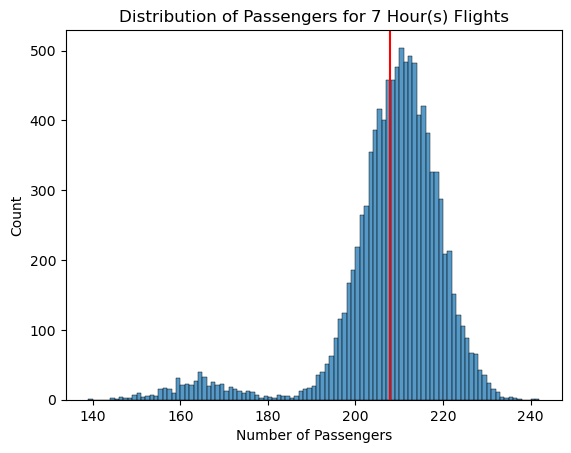

Mean Number of Passengers: 208


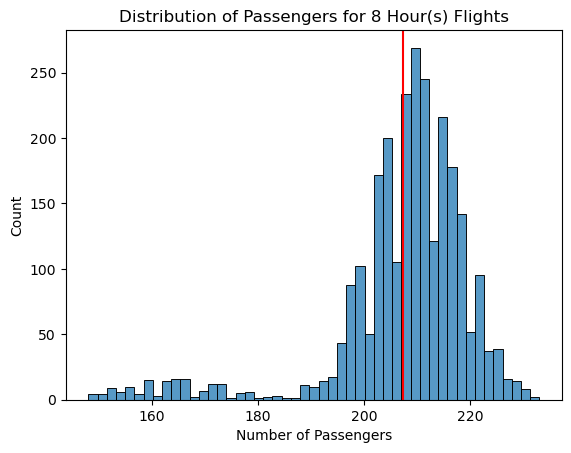

Mean Number of Passengers: 207


<Figure size 640x480 with 0 Axes>

In [57]:
for i in range(1,9):
    temp = flight[flight.hours == i]
    sns.histplot(x='passengers', data=temp)
    plt.title('Distribution of Passengers for {} Hour(s) Flights'.format(i))
    plt.xlabel('Number of Passengers')
    plt.axvline(np.mean(temp.passengers), color='r')
    plt.show()
    plt.clf()
    print('Mean Number of Passengers: {}'.format(round(np.mean(temp.passengers))))

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

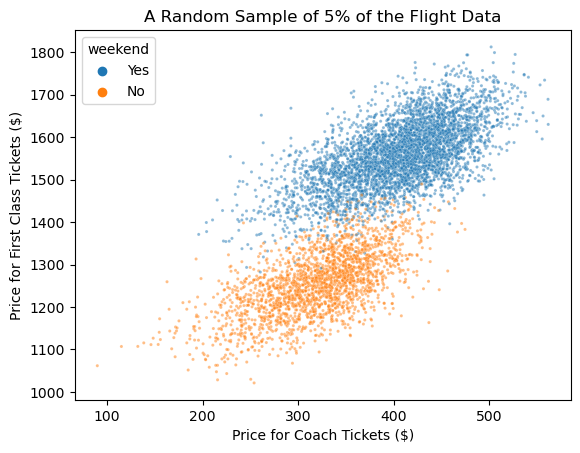

<Figure size 640x480 with 0 Axes>

In [8]:
## Task 7
sns.scatterplot(x='coach_price', y='firstclass_price',hue='weekend', s=5, alpha=0.5, data=flight_subset)
plt.title('A Random Sample of 5% of the Flight Data')
plt.xlabel('Price for Coach Tickets ($)')
plt.ylabel('Price for First Class Tickets ($)')
plt.show()
plt.clf()



8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

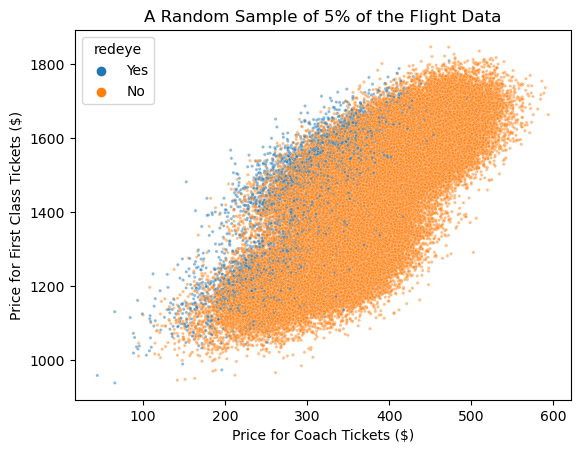

<Figure size 640x480 with 0 Axes>

In [9]:
## Task 8
sns.scatterplot(x='coach_price', y='firstclass_price',hue='redeye', s=5, alpha=0.5, data=flight)
plt.title('A Random Sample of 5% of the Flight Data')
plt.xlabel('Price for Coach Tickets ($)')
plt.ylabel('Price for First Class Tickets ($)')
plt.show()
plt.clf()






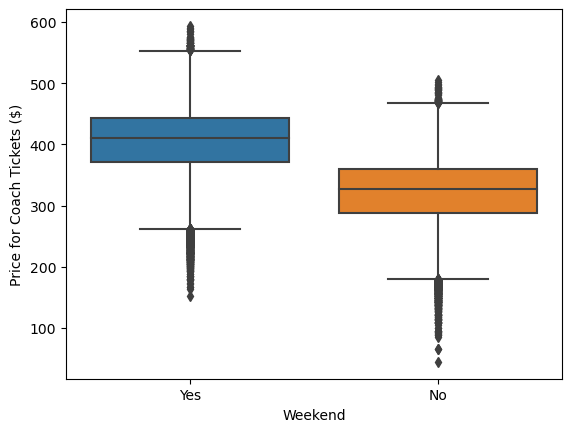

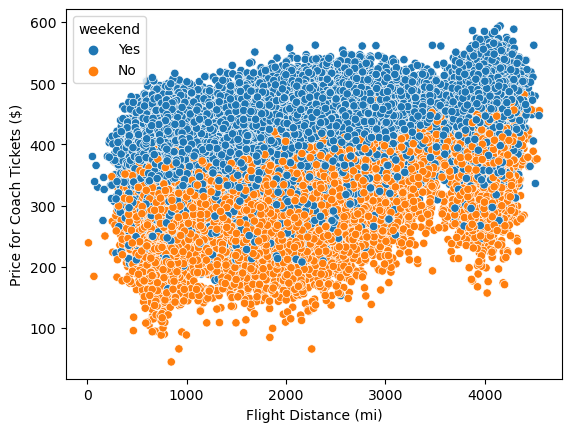

<Figure size 640x480 with 0 Axes>

In [2]:
sns.boxplot(x='weekend',y='coach_price', data=flight)
plt.xlabel('Weekend')
plt.ylabel('Price for Coach Tickets ($)')
plt.show()
plt.clf()

sns.scatterplot(x='miles', y='coach_price', hue='weekend', data=flight)
plt.xlabel('Flight Distance (mi)')
plt.ylabel('Price for Coach Tickets ($)')
plt.show()
plt.clf()